<a href="https://colab.research.google.com/github/BrendaChepkoech/WEEK-4-IP-AUTOLIB-HYPOTHESIS-TESTING/blob/main/Brenda_Chepkoech_week_4_IP_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

As a Data Scientist for the Autolib electric car-sharing service company, investigate a claim about the blue cars from the provided Autolib dataset.

**Null Hypothesis** :
The number of Blue cars taken on weekdays are more than the number of Blue cars taken on weekends

**Alternative Hypothesis** : 
The number of Blue cars taken on week days are not more than the number of Blue cars taken on weekends.


### b) Defining the Metric for Success


To be able to carry out hypothesis testing as our solution to the above data analytic question and be able to decide whether to reject or fail to reject the null hypothesis.

### c) Understanding the context 

Autolib is an electric car-sharing service company in Paris, France. It deals with electric cars such as Blue cars, Utilib and Utilib 1.4

We are tasked to investigate a claim about the blue cars from the provided Autolib dataset.

### d) Recording the Experimental Design


Below are the steps that I will take
*   Loading the dataset into our eviroment
*   Performing data cleaning
*   Exploratory Data Analysis
*   Hypothesis testing
*   Conclusion




### e) Data Relevance

The dataset we have been provided is relevant because data such as the number of blue cars returned or taken, the postal code to show the location and the dates are all necessary in helping us understand the electric car usage in Paris.

#2.Reading the Data

In [159]:
# Step 1: Importing Libraries
import pandas as pd
pd.options.mode.chained_assignment=None
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats

In [160]:
# step 2:Loading the Data from the source i.e. csv
# ---
#Dataset url="http://bit.ly/DSCoreAutolibDataset"
df= pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [161]:
#Step 3: Loading the Variable Definitions dataset
df2= pd.read_csv("columns_explanation.csv")
df2.head

<bound method NDFrame.head of                Column name                                        explanation
0              Postal code                 postal code of the area (in Paris)
1                     date                        date of the row aggregation
2      n_daily_data_points  number of daily data poinst that were availabl...
3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
4                 day_type                                 weekday or weekend
5       BlueCars_taken_sum    Number of bluecars taken that date in that area
6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
7         Utilib_taken_sum      Number of Utilib taken that date in that area
8      Utilib_returned_sum   Number of Utilib returned that date in that area
9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
11         Slots_freed_sum  Number

# 3.Checking the Data

In [162]:
# Determining the no. of records in our dataset
df.shape

(16085, 13)

In [163]:
# Previewing the top of our dataset
df.head(4)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21


In [164]:
# Previewing the bottom of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [165]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [166]:
# Getting to know more about the dataset by accessing its information
print(df.columns)

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')


#4.Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


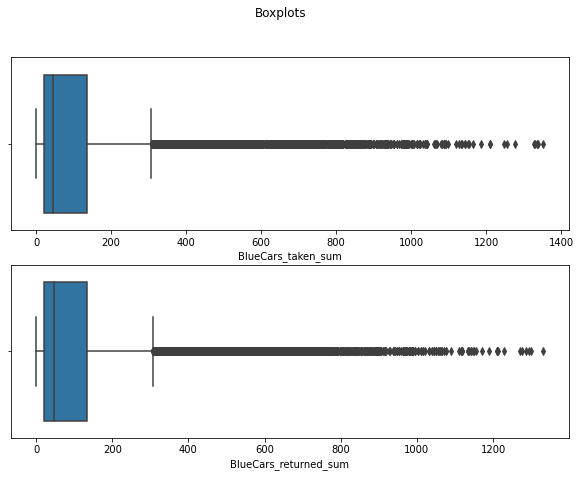

In [167]:
# We can identify outliers in our data using boxplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(df['BlueCars_returned_sum'], ax=ax2)
plt.show()

In [168]:
# Checking for Anomalies
#
for value in df.columns:
    df[value].unique()

In [169]:
# Identifying the Missing Data
#
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [170]:
# Dealing with the Missing Data
#checking for duplicates
df.duplicated().sum()

0

In [171]:
# LETS identify the days of the week by their actual names
df['day_of_week'] = df['dayOfWeek'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,day_of_week
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,Tuesday
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,Wednesday
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21,Thursday
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20,Friday


In [172]:
#Dropping the irrelevant columns
df.drop(df[['Utilib_taken_sum','Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum']],axis=1,inplace=True)
df.head(4)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,day_of_week
0,75001,1/1/2018,1440,0,weekday,110,103,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,Tuesday
2,75001,1/3/2018,1439,2,weekday,138,139,Wednesday
3,75001,1/4/2018,1320,3,weekday,104,104,Thursday


#5.Exploratory Analysis

##5.1 Univariate Data Analysis

In [173]:
#Numerical variables
#Measures of central tendency for the bluecars taken
#Mode 
taken_mode = df['BlueCars_taken_sum'].mode()
print("The mode of the bluecars taken sum is: '\n", taken_mode)
print('\n')

# Median
taken_median = df['BlueCars_taken_sum'].median()
print("The median of the bluecars taken': ", taken_median)
print('\n')

# Mean 
taken_mode = df['BlueCars_taken_sum'].mean()
print("The average bluecars taken is: ", taken_mode)

The mode of the bluecars taken sum is: '
 0    12
dtype: int64


The median of the bluecars taken':  46.0


The average bluecars taken is:  125.92695057506994


In [174]:
#Measures of central tendency for the bluecars returned
#Mode 
returned_mode = df['BlueCars_returned_sum'].mode()
print("The mode of the bluecars returned sum is: '\n", taken_mode)
print('\n')

# Median
returned_median = df['BlueCars_returned_sum'].median()
print("The median of the bluecars returned': ", taken_median)
print('\n')

# Mean 
returned_mode = df['BlueCars_returned_sum'].mean()
print("The average bluecars returned is: ", taken_mode)

The mode of the bluecars returned sum is: '
 125.92695057506994


The median of the bluecars returned':  46.0


The average bluecars returned is:  125.92695057506994


In [175]:
# Standard deviation
# Standard deviation of respondents age
std_taken = df['BlueCars_taken_sum'].std()
print("The standard deviation of the BlueCars taken is: ", std_taken)
# Standard deviation of household_size
std_return = df['BlueCars_returned_sum'].std()
print("The standard deviation of BlueCars_returned is: ", std_return)

The standard deviation of the BlueCars taken is:  185.42657876727893
The standard deviation of BlueCars_returned is:  185.50153480148427


In [176]:
# Variance
# Variance of respondents age
taken_var = df['BlueCars_taken_sum'].var()
print("The variance of the BlueCars taken is: ", taken_var)
# Variance of household_size
returned_var = df['BlueCars_returned_sum'].var()
print("The variance of BlueCars_returned_sum is: ", returned_var)

The variance of the BlueCars taken is:  34383.01611333789
The variance of BlueCars_returned_sum is:  34410.819413706275


In [177]:
# Range
#Rage of household_size and respondent age
range= (df["BlueCars_taken_sum"].max())-(df["BlueCars_taken_sum"].min())
print("The range of BlueCars_taken_sum is:  ",range)
range2= (df["BlueCars_returned_sum"].max())-(df["BlueCars_returned_sum"].min())
print("The range of BlueCars_returned_sum is:  ",range2)

The range of BlueCars_taken_sum is:   1352
The range of BlueCars_returned_sum is:   1332


In [178]:
# Finding the quantiles of household_size
q_taken = df["BlueCars_taken_sum"].quantile([0.25,0.5,0.75])
print(q_taken)
# Finding the quantiles of Respondent Age
q_returned = df["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])
print(q_returned)

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64
0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64


In [179]:
# Determining the skeweness
taken_skew= df["BlueCars_taken_sum"].skew()
print("The skewness of the BlueCars_taken is: \n", taken_skew)
if taken_skew == 0:
  print("The distribution is symmetrical")
elif taken_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the BlueCars_taken is: 
 2.4063548974959086
The distribution is positively skewed




In [180]:
# Determining the kurtosis 
taken_kurt= df["BlueCars_taken_sum"].kurt()
print("The kurtosis of the BlueCars_taken is: \n", taken_kurt)
if taken_kurt > 0:
  print("The household size column is leptokurtic")
elif taken_kurt < 0:
  print("The household size is platykurtic")
else:
  print("The household size is mesokurtic")
print('\n') 

The kurtosis of the BlueCars_taken is: 
 6.172692305510042
The household size column is leptokurtic




In [181]:
#Displaying the summary statistics of the dataframe
#
taken= df["BlueCars_taken_sum"].describe()
returned= df["BlueCars_returned_sum"].describe()
print(taken)
print(returned)

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BlueCars_taken_sum, dtype: float64
count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: BlueCars_returned_sum, dtype: float64


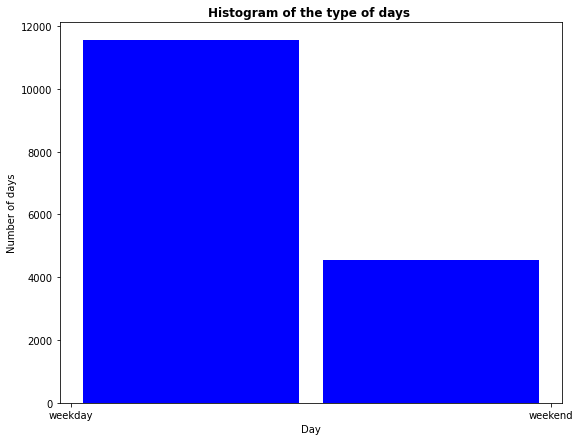

In [182]:
# Histogram of the days of the week
day = df['day_type']
fig=plt.figure(figsize=(9,7))
plt.hist(day, bins=2, histtype='bar', color='blue', rwidth=0.9)
plt.title("Histogram of the type of days ", fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Number of days")
plt.show()

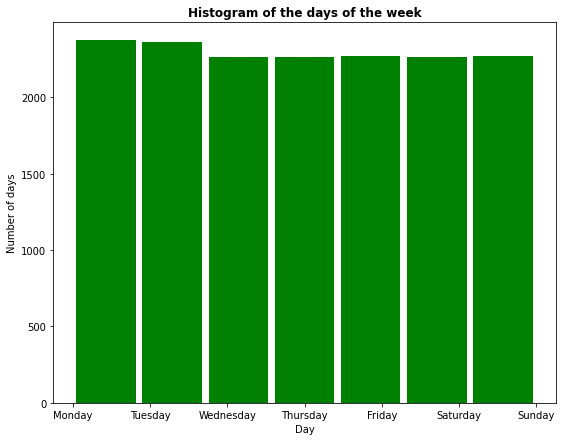

In [183]:
# Histogram of the days of the week
day = df['day_of_week']
fig=plt.figure(figsize=(9,7))
plt.hist(day, bins=7, histtype='bar', color='green', rwidth=0.9)
plt.title("Histogram of the days of the week", fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Number of days")
plt.show()

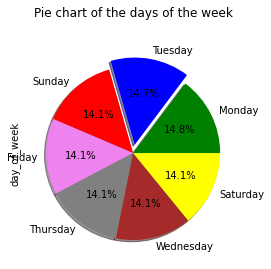

In [184]:
# Pie chart 
# Pie chart for the days of the week
df['day_of_week'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0,0,0,0,0), colors=['green',"blue","red","violet","grey","brown",'yellow'], autopct='%1.1f%%')
plt.title("Pie chart of the days of the week", y=1.1)
plt.show()

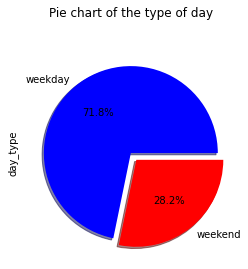

In [185]:
# Pie chart for the days of the week
df['day_type'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=["blue","red"], autopct='%1.1f%%')
plt.title("Pie chart of the type of day", y=1.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


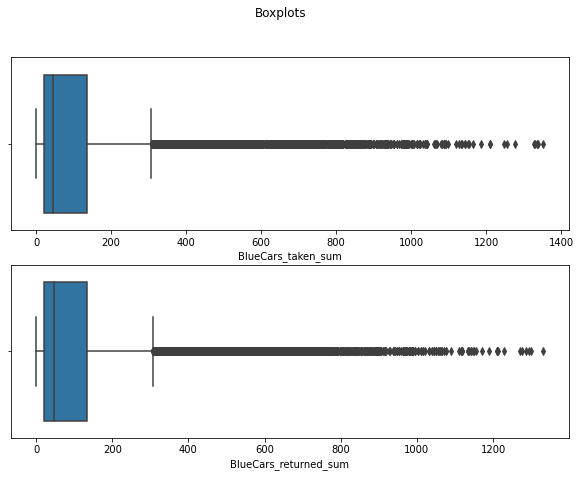

In [186]:
#boxplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(df['BlueCars_returned_sum'], ax=ax2)
plt.show()

##5.2 Bivariate Analysis

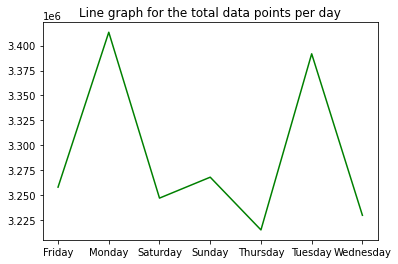

In [187]:
#Ctegorical and Numerical variables
# Line graph for daily data points
points = df.groupby('day_of_week')['n_daily_data_points'].sum().reset_index(name= 'total_n_daily_data_points')
x = points['day_of_week']
y= points['total_n_daily_data_points']
plt.title("Line graph for the total data points per day")
plt.plot(x,y, color = 'green')
plt.show()

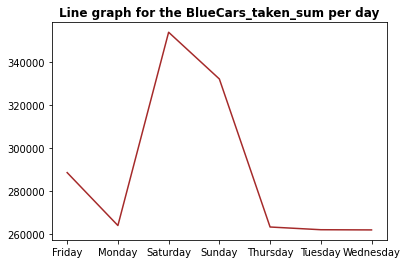

In [188]:
# Line graph for daily data points
points= df.groupby('day_of_week')['BlueCars_taken_sum'].sum().reset_index(name= 'BlueCars_taken_sum')
x = points['day_of_week']
y= points['BlueCars_taken_sum']
plt.title("Line graph for the BlueCars_taken_sum per day", fontweight='bold')
plt.plot(x,y, color = "brown")
plt.show()

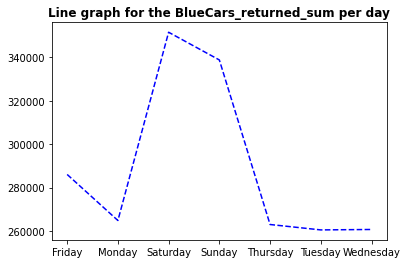

In [189]:
# Line graph for daily data points
points = df.groupby('day_of_week')['BlueCars_returned_sum'].sum().reset_index(name= 'BlueCars_returned_sum')
x = points['day_of_week']
y= points['BlueCars_returned_sum']
plt.title("Line graph for the BlueCars_returned_sum per day", fontweight='bold')
plt.plot(x,y, color = 'blue', linestyle = '--' )
plt.show()

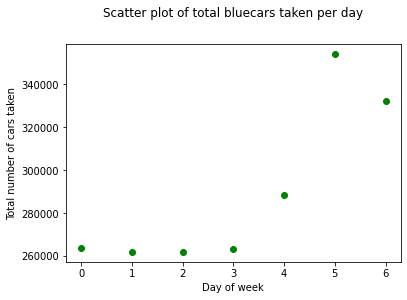

In [190]:
#Numerical and numerical variables
# Scatter plot of the total bluecars taken per day
size=df.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().reset_index(name='total number of cars taken per day')
size
plt.scatter(size["dayOfWeek"] , size["total number of cars taken per day"], c='g')
plt.xlabel("Day of week")
plt.ylabel("Total number of cars taken")
plt.title("Scatter plot of total bluecars taken per day", y=1.1)
plt.show()

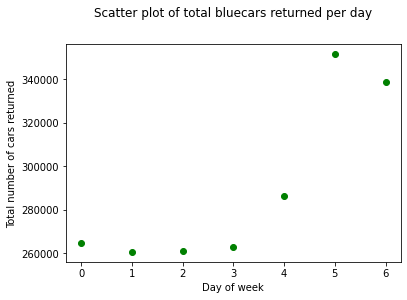

In [191]:
# Scatter plot of the total bluecars returned per day

siz=df.groupby('dayOfWeek')['BlueCars_returned_sum'].sum().reset_index(name='total number of cars returned per day')
siz
plt.scatter(siz["dayOfWeek"] , siz["total number of cars returned per day"], c='g')
plt.xlabel("Day of week")
plt.ylabel("Total number of cars returned")
plt.title("Scatter plot of total bluecars returned per day", y=1.1)
plt.show()

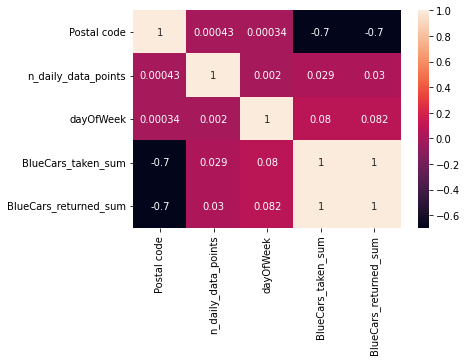

In [192]:
# Correlation using a heatmap

sns.heatmap(df.corr(),annot=True)
plt.show()

#there is a strong correlation between the Bluecars taken and the blue cars returned.

# 6.Implementing the Solution

#  Hypothesis Testing

As a Data Scientist for the Autolib electric car-sharing service company, investigate a claim about the blue cars from the provided Autolib dataset.

**Null Hypothesis** :
The number of Blue cars taken on weekdays are more than the number of Blue cars taken on weekends

**Alternative Hypothesis** : 
The number of Blue cars taken on week days are not more than the number of Blue cars taken on weekends.



In [193]:
#defining our hypothesis population
pop= df[["day_type","BlueCars_taken_sum"]]

wkday=pop.loc[(pop["day_type"]=="weekday")]
wkend=pop.loc[(pop["day_type"]=="weekend")]

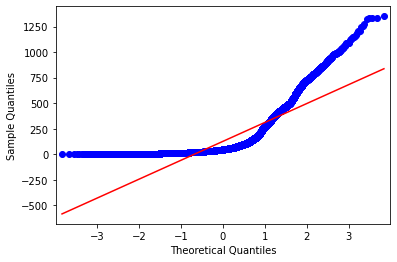

In [194]:
#Checking normality of our sample
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(pop['BlueCars_taken_sum'],line='s')
pyplot.show()

In [195]:
#picking the sample size that we need
import random
sample_1 =wkday["BlueCars_taken_sum"].sample(n = 100,random_state=1)
sample_2 = wkend["BlueCars_taken_sum"].sample(n = 100,random_state=1)

In [196]:
#importing our library
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test
ztest(sample_1, sample_2, value=0) 


(-1.4437992453388084, 0.14879545435592487)

In [197]:
# Interpret the p value by comparing with the significance level

alpha = 0.05
p_value=0.14879545435592487
if p_value < alpha:
  print("Reject the null hypothesis and accept the alternative hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Conclusion
our p_value is greater than our alpha level (0.05)
Since the p-value is greater than 0.05, we fail to reject the null hypothesis and clearly state that the We have enough evidence to say that more Blue cars are taken on weekdays than on weekends 

Recommendation
The autolib company should avail more cars during the week as we have a huge market base that needs to be tapped.
